In [150]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

#In this notebook I want to learn to implement a multiple linear regression model using scikit-learn
#Yₑ = α + β₁X₁ + β₂X₂ + … + βₚXₚ
# p = number of predictors

In [151]:
#read dataset

df = pd.read_csv('imdb.csv')
df.dtypes

Name           object
Date            int64
Rate           object
Votes          object
Genre          object
Duration       object
Type           object
Certificate    object
Episodes       object
Nudity         object
Violence       object
Profanity      object
Alcohol        object
Frightening    object
dtype: object

In [152]:
df.head(10)

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90,Film,R,-,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97,Film,PG-13,-,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155,Film,PG-13,-,None,Moderate,None,Mild,Moderate
5,Ted Lasso,2021,8.8,"117,562","Comedy, Drama, Sport",30,Series,TV-MA,23,Mild,None,Severe,Mild,None
6,Free Guy,2021,7.3,"153,835","Action, Adventure, Comedy",115,Film,PG-13,-,Mild,Moderate,Moderate,None,Mild
7,House of the Dragon,2021,No Rate,No Votes,"Action, Adventure, Drama",None,Series,None,10,No Rate,No Rate,No Rate,No Rate,No Rate
8,What If...?,2021,7.6,"51,959","Animation, Action, Adventure",None,Series,TV-14,18,None,Moderate,Mild,Mild,Moderate
9,Sex Education,2021,8.3,"220,201","Comedy, Drama",45,Series,TV-MA,25,Severe,Mild,Severe,Moderate,Mild


In [153]:
#123456790 = NaN
df = df.replace('No Rate', np.nan)
df = df.replace('No Votes', np.nan)
df = df.replace('None', np.nan)

df['Duration'] = df['Duration'].astype(str).astype(float)
df['Votes'] = df['Votes'].str.replace(',','')
df['Votes'] = df['Votes'].astype(str).astype(float)

df.head(10)

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,107163.0,"Action, Adventure, Thriller",163.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,64375.0,"Crime, Drama, Thriller",90.0,Film,R,-,NaN,NaN,Severe,NaN,Moderate
2,The Many Saints of Newark,2021,6.4,27145.0,"Crime, Drama",120.0,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,30443.0,"Action, Adventure, Sci-Fi",97.0,Film,PG-13,-,NaN,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,84636.0,"Action, Adventure, Drama",155.0,Film,PG-13,-,NaN,Moderate,NaN,Mild,Moderate
5,Ted Lasso,2021,8.8,117562.0,"Comedy, Drama, Sport",30.0,Series,TV-MA,23,Mild,NaN,Severe,Mild,NaN
6,Free Guy,2021,7.3,153835.0,"Action, Adventure, Comedy",115.0,Film,PG-13,-,Mild,Moderate,Moderate,NaN,Mild
7,House of the Dragon,2021,NaN,NaN,"Action, Adventure, Drama",NaN,Series,NaN,10,NaN,NaN,NaN,NaN,NaN
8,What If...?,2021,7.6,51959.0,"Animation, Action, Adventure",NaN,Series,TV-14,18,NaN,Moderate,Mild,Mild,Moderate
9,Sex Education,2021,8.3,220201.0,"Comedy, Drama",45.0,Series,TV-MA,25,Severe,Mild,Severe,Moderate,Mild


In [154]:
dumean = df['Duration'].mean()
vomean = df['Votes'].mean()

print('duration_mean = ' +str(round(dumean)))
print('votes_mean = ' +str(round(vomean)))

duration_mean = 95
votes_mean = 122364


In [155]:
df['Duration'] = round(df['Duration'].replace(np.nan,dumean))
df['Votes'] = round(df['Votes'].replace(np.nan,vomean))
df.head(10)

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,107163.0,"Action, Adventure, Thriller",163.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,64375.0,"Crime, Drama, Thriller",90.0,Film,R,-,NaN,NaN,Severe,NaN,Moderate
2,The Many Saints of Newark,2021,6.4,27145.0,"Crime, Drama",120.0,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,30443.0,"Action, Adventure, Sci-Fi",97.0,Film,PG-13,-,NaN,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,84636.0,"Action, Adventure, Drama",155.0,Film,PG-13,-,NaN,Moderate,NaN,Mild,Moderate
5,Ted Lasso,2021,8.8,117562.0,"Comedy, Drama, Sport",30.0,Series,TV-MA,23,Mild,NaN,Severe,Mild,NaN
6,Free Guy,2021,7.3,153835.0,"Action, Adventure, Comedy",115.0,Film,PG-13,-,Mild,Moderate,Moderate,NaN,Mild
7,House of the Dragon,2021,NaN,122364.0,"Action, Adventure, Drama",95.0,Series,NaN,10,NaN,NaN,NaN,NaN,NaN
8,What If...?,2021,7.6,51959.0,"Animation, Action, Adventure",95.0,Series,TV-14,18,NaN,Moderate,Mild,Mild,Moderate
9,Sex Education,2021,8.3,220201.0,"Comedy, Drama",45.0,Series,TV-MA,25,Severe,Mild,Severe,Moderate,Mild


In [156]:
model = smf.ols('Votes ~ Duration',data=df)
model = model.fit()

In [157]:
model.params

Intercept     828.249308
Duration     1284.761443
dtype: float64

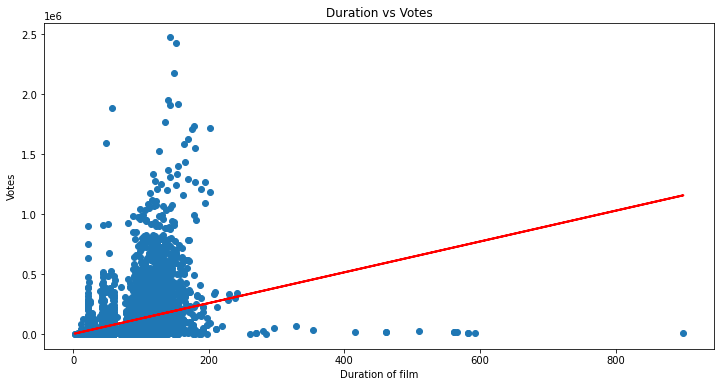

In [158]:
#intercept -> cuando eje abcisas es = 0 (x=0).
#duration en este caso es el slope; pendent (m).
#per tant, l'equació és : y = 828.249308 + 1284.761443*Duration

votes_pred = model.predict()
plt.figure(figsize=(12, 6))
plt.plot(df['Duration'], df['Votes'], 'o')           # scatter plot showing actual data
plt.plot(df['Duration'], votes_pred, 'r', linewidth=2)   # regression line
plt.xlabel('Duration of film')
plt.ylabel('Votes')
plt.title('Duration vs Votes')

plt.show()

In [ ]:
#lol